# First Machine Learning Project

## Automate the Data Fetching 

In [1]:
import os 
from zipfile import ZipFile

def extract_data(name_of_zip="cars", ROOT='C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets', extension=".csv.zip", reset_path="C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML"):
    os.chdir("C:/Users/VTSB/Downloads")
    print(os.getcwd())
    with ZipFile(name_of_zip + extension, 'r') as zipObj:
           zipObj.extractall(os.path.join(ROOT, name_of_zip))
    os.chdir(reset_path)
    print(os.getcwd())
        
extract_data()

C:\Users\VTSB\Downloads
C:\Users\VTSB\Desktop\CS Resources\AI Hands-On ML


In [2]:
import pandas as pd

def load_data(ROOT='C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets', extension=".csv", name_of_zip="cars"):
    csv_path = ROOT + "/" + name_of_zip + "/" + name_of_zip + extension
    print(csv_path)
    return pd.read_csv(csv_path)

original_df = load_data()

C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets/cars/cars.csv


In [3]:
original_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [4]:
original_df = original_df.drop(columns="model_name")

In [5]:
original_df["engine_fuel"].value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

In [6]:
original_df["engine_fuel"] = original_df["engine_fuel"].replace(["hybrid-diesel", "electric"], "gasoline")

In [7]:
original_df["engine_fuel"].value_counts()

gasoline         24077
diesel           12872
gas               1347
hybrid-petrol      235
Name: engine_fuel, dtype: int64

## Preview the Data

In [8]:
original_df.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,...,True,False,True,True,False,False,False,False,True,7


In [9]:
original_df.info()

# engine_capacity has a few nulls (10)

# bool(13)
# float64(2)
# int64(5)
# object(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   transmission       38531 non-null  object 
 2   color              38531 non-null  object 
 3   odometer_value     38531 non-null  int64  
 4   year_produced      38531 non-null  int64  
 5   engine_fuel        38531 non-null  object 
 6   engine_has_gas     38531 non-null  bool   
 7   engine_type        38531 non-null  object 
 8   engine_capacity    38521 non-null  float64
 9   body_type          38531 non-null  object 
 10  has_warranty       38531 non-null  bool   
 11  state              38531 non-null  object 
 12  drivetrain         38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  bool   
 15  location_region    38531 non-null  object 
 16  number_of_photos   385

In [10]:
original_df.columns

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'price_usd', 'is_exchangeable', 'location_region', 'number_of_photos',
       'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed'],
      dtype='object')

In [11]:
original_df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [12]:
original_df.shape

(38531, 29)

In [13]:
for x in original_df.columns:
    if original_df[x].dtype == "O":
        print(x + ": ", original_df[x].value_counts().count())

manufacturer_name:  55
transmission:  2
color:  12
engine_fuel:  4
engine_type:  3
body_type:  12
state:  3
drivetrain:  3
location_region:  6


In [14]:
# counter = 0
# for x in original_df["model_name"].value_counts():
#     if x < 100:
#         counter += 1
# print(str(counter) + "\n") # number of model_names that have a frequency of less than 100

# print(original_df["model_name"].value_counts().sort_values(ascending=True))

['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']


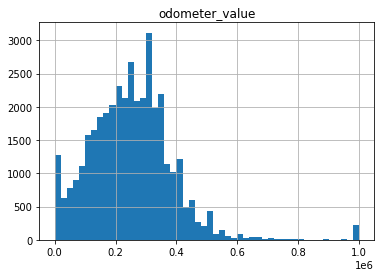

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def listing_numerical_columns():
    list_of_numerical_columns = []
    for x in original_df.columns:
        if original_df[x].dtype == "int64" or original_df[x].dtype == "float64":
            list_of_numerical_columns.append(x)
    print(list_of_numerical_columns)
        
listing_numerical_columns()
        
def preview_graphs(numerical_column_name):
    if original_df[numerical_column_name].dtype == "int64" or original_df[numerical_column_name].dtype == "float64":
        original_df[numerical_column_name].hist(bins=50)
        plt.title(numerical_column_name)

preview_graphs("odometer_value")

## Create Test Data

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=0.2, n_splits=1, random_state=42)

for train_index, test_index in split.split(original_df, original_df["manufacturer_name"]):
    strat_train_set = original_df.loc[train_index]
    strat_test_set = original_df.loc[test_index]
    
strat_train_set

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,automatic,blue,295000,2003,diesel,False,diesel,2.2,sedan,...,True,True,False,False,False,False,False,True,True,96
4321,Opel,mechanical,blue,410000,1998,diesel,False,diesel,2.0,hatchback,...,False,False,True,False,False,False,False,False,True,133
2192,Opel,automatic,silver,239000,2010,gasoline,False,gasoline,2.0,liftback,...,True,False,True,True,True,True,True,True,True,31
34316,Mercedes-Benz,automatic,black,347000,1995,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,True,1
14557,Seat,mechanical,other,150000,1998,gasoline,False,gasoline,1.6,sedan,...,True,False,True,True,True,False,True,False,True,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,automatic,blue,170000,2003,diesel,False,diesel,2.2,minivan,...,True,False,True,True,True,True,True,True,False,85
2530,Opel,mechanical,black,250000,1998,gasoline,False,gasoline,2.0,hatchback,...,True,False,False,False,False,False,False,False,True,91
20320,Audi,mechanical,black,330000,1987,gasoline,False,gasoline,2.2,universal,...,False,False,False,False,False,False,False,False,False,12
23274,ГАЗ,mechanical,grey,343000,1964,gasoline,False,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,False,153


In [17]:
# check how evenly distributed the stratification was 

strat_ratio = strat_train_set["manufacturer_name"].value_counts() / len(strat_train_set)
print(strat_ratio)

Volkswagen       0.110109
Opel             0.071600
BMW              0.067739
Ford             0.066604
Renault          0.064690
Audi             0.064041
Mercedes-Benz    0.058039
Peugeot          0.049539
Citroen          0.040520
Nissan           0.035330
Mazda            0.034454
Toyota           0.032345
Hyundai          0.028971
Skoda            0.028257
Kia              0.023650
Mitsubishi       0.023034
Fiat             0.021379
Honda            0.020698
Volvo            0.018719
ВАЗ              0.012490
Chevrolet        0.011322
Chrysler         0.010641
Seat             0.007851
Dodge            0.007721
Subaru           0.007559
Rover            0.006099
Suzuki           0.006067
Daewoo           0.005742
Lexus            0.005515
Alfa Romeo       0.005385
ГАЗ              0.005191
Land Rover       0.004769
Infiniti         0.004217
LADA             0.003796
Iveco            0.003601
Saab             0.002790
Jeep             0.002790
Lancia           0.002401
SsangYong   

In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7707 entries, 12249 to 8492
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  7707 non-null   object 
 1   transmission       7707 non-null   object 
 2   color              7707 non-null   object 
 3   odometer_value     7707 non-null   int64  
 4   year_produced      7707 non-null   int64  
 5   engine_fuel        7707 non-null   object 
 6   engine_has_gas     7707 non-null   bool   
 7   engine_type        7707 non-null   object 
 8   engine_capacity    7705 non-null   float64
 9   body_type          7707 non-null   object 
 10  has_warranty       7707 non-null   bool   
 11  state              7707 non-null   object 
 12  drivetrain         7707 non-null   object 
 13  price_usd          7707 non-null   float64
 14  is_exchangeable    7707 non-null   bool   
 15  location_region    7707 non-null   object 
 16  number_of_photos   7

In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30824 entries, 3010 to 21987
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30824 non-null  object 
 1   transmission       30824 non-null  object 
 2   color              30824 non-null  object 
 3   odometer_value     30824 non-null  int64  
 4   year_produced      30824 non-null  int64  
 5   engine_fuel        30824 non-null  object 
 6   engine_has_gas     30824 non-null  bool   
 7   engine_type        30824 non-null  object 
 8   engine_capacity    30816 non-null  float64
 9   body_type          30824 non-null  object 
 10  has_warranty       30824 non-null  bool   
 11  state              30824 non-null  object 
 12  drivetrain         30824 non-null  object 
 13  price_usd          30824 non-null  float64
 14  is_exchangeable    30824 non-null  bool   
 15  location_region    30824 non-null  object 
 16  number_of_photos   

In [20]:
strat_train_set_features = strat_train_set.drop("price_usd", axis=1)
strat_train_set_labels = strat_train_set["price_usd"].copy()

In [21]:
strat_train_set_features

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,automatic,blue,295000,2003,diesel,False,diesel,2.2,sedan,...,True,True,False,False,False,False,False,True,True,96
4321,Opel,mechanical,blue,410000,1998,diesel,False,diesel,2.0,hatchback,...,False,False,True,False,False,False,False,False,True,133
2192,Opel,automatic,silver,239000,2010,gasoline,False,gasoline,2.0,liftback,...,True,False,True,True,True,True,True,True,True,31
34316,Mercedes-Benz,automatic,black,347000,1995,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,True,1
14557,Seat,mechanical,other,150000,1998,gasoline,False,gasoline,1.6,sedan,...,True,False,True,True,True,False,True,False,True,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,automatic,blue,170000,2003,diesel,False,diesel,2.2,minivan,...,True,False,True,True,True,True,True,True,False,85
2530,Opel,mechanical,black,250000,1998,gasoline,False,gasoline,2.0,hatchback,...,True,False,False,False,False,False,False,False,True,91
20320,Audi,mechanical,black,330000,1987,gasoline,False,gasoline,2.2,universal,...,False,False,False,False,False,False,False,False,False,12
23274,ГАЗ,mechanical,grey,343000,1964,gasoline,False,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,False,153


In [22]:
strat_train_set_labels

3010      4500.0
4321      1000.0
2192     10500.0
34316     1950.0
14557     2300.0
          ...   
36217     5750.0
2530      2200.0
20320     1500.0
23274      650.0
21987      350.0
Name: price_usd, Length: 30824, dtype: float64

## EDA

In [23]:
strat_train_set_EDA = strat_train_set.copy()
corr_matrix = strat_train_set_EDA.corr()

In [24]:
corr_matrix["price_usd"].sort_values(ascending=False)

price_usd           1.000000
year_produced       0.705198
feature_7           0.498854
feature_3           0.469304
feature_6           0.454012
feature_8           0.448584
feature_5           0.433368
feature_2           0.341158
feature_4           0.336468
number_of_photos    0.320032
engine_capacity     0.296320
has_warranty        0.282979
feature_9           0.267185
feature_1           0.256219
up_counter          0.058484
duration_listed     0.033377
is_exchangeable    -0.001069
engine_has_gas     -0.062660
feature_0          -0.222422
odometer_value     -0.420622
Name: price_usd, dtype: float64

## Data Cleaning And Combinations

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [26]:
strat_train_set_features

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,automatic,blue,295000,2003,diesel,False,diesel,2.2,sedan,...,True,True,False,False,False,False,False,True,True,96
4321,Opel,mechanical,blue,410000,1998,diesel,False,diesel,2.0,hatchback,...,False,False,True,False,False,False,False,False,True,133
2192,Opel,automatic,silver,239000,2010,gasoline,False,gasoline,2.0,liftback,...,True,False,True,True,True,True,True,True,True,31
34316,Mercedes-Benz,automatic,black,347000,1995,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,True,1
14557,Seat,mechanical,other,150000,1998,gasoline,False,gasoline,1.6,sedan,...,True,False,True,True,True,False,True,False,True,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,automatic,blue,170000,2003,diesel,False,diesel,2.2,minivan,...,True,False,True,True,True,True,True,True,False,85
2530,Opel,mechanical,black,250000,1998,gasoline,False,gasoline,2.0,hatchback,...,True,False,False,False,False,False,False,False,True,91
20320,Audi,mechanical,black,330000,1987,gasoline,False,gasoline,2.2,universal,...,False,False,False,False,False,False,False,False,False,12
23274,ГАЗ,mechanical,grey,343000,1964,gasoline,False,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,False,153


In [27]:
empty_list = []
for x in strat_train_set_features.columns:
    if strat_train_set_features[x].dtype == "float64" or strat_train_set_features[x].dtype == "int64":
        empty_list.append(x)
        
print(empty_list)
a = strat_train_set_features[empty_list]
a

['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos', 'up_counter', 'duration_listed']


,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed
3010,295000,2003,2.2,14,25,96
4321,410000,1998,2.0,14,8,133
2192,239000,2010,2.0,13,11,31
34316,347000,1995,1.8,15,1,1
14557,150000,1998,1.6,7,35,57
...,...,...,...,...,...,...
36217,170000,2003,2.2,6,39,85
2530,250000,1998,2.0,9,30,91
20320,330000,1987,2.2,9,5,12
23274,343000,1964,2.4,4,91,153


In [28]:
2019 - a.iloc[:,1]

3010     16
4321     21
2192      9
34316    24
14557    21
         ..
36217    16
2530     21
20320    32
23274    55
21987    14
Name: year_produced, Length: 30824, dtype: int64

In [29]:
imputer = SimpleImputer(strategy="median")
b = imputer.fit_transform(a)
# print(imputer.statistics_)
print(len(b), len(b[0]))

print(b)
print(b[:, 1])

30824 6
[[2.950e+05 2.003e+03 2.200e+00 1.400e+01 2.500e+01 9.600e+01]
 [4.100e+05 1.998e+03 2.000e+00 1.400e+01 8.000e+00 1.330e+02]
 [2.390e+05 2.010e+03 2.000e+00 1.300e+01 1.100e+01 3.100e+01]
 ...
 [3.300e+05 1.987e+03 2.200e+00 9.000e+00 5.000e+00 1.200e+01]
 [3.430e+05 1.964e+03 2.400e+00 4.000e+00 9.100e+01 1.530e+02]
 [7.896e+03 2.005e+03 1.200e+00 5.000e+00 1.000e+00 1.000e+00]]
[2003. 1998. 2010. ... 1987. 1964. 2005.]


### Custom Transformer

In [30]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X
        
s = CombinedAttributesAdder()
c = s.fit_transform(b)
print(c)

[[2.950e+05 2.003e+03 2.200e+00 1.400e+01 2.500e+01 9.600e+01]
 [4.100e+05 1.998e+03 2.000e+00 1.400e+01 8.000e+00 1.330e+02]
 [2.390e+05 2.010e+03 2.000e+00 1.300e+01 1.100e+01 3.100e+01]
 ...
 [3.300e+05 1.987e+03 2.200e+00 9.000e+00 5.000e+00 1.200e+01]
 [3.430e+05 1.964e+03 2.400e+00 4.000e+00 9.100e+01 1.530e+02]
 [7.896e+03 2.005e+03 1.200e+00 5.000e+00 1.000e+00 1.000e+00]]


In [31]:
scaler = StandardScaler()
scaler.fit_transform(a)

array([[ 0.33975121,  0.00719461,  0.21497182,  0.70664639,  0.19398229,
         0.14000126],
       [ 1.18228935, -0.61226526, -0.08328452,  0.70664639, -0.18804205,
         0.46946928],
       [-0.07052823,  0.87443843, -0.08328452,  0.54303806, -0.12062599,
        -0.43879391],
       ...,
       [ 0.59617586, -1.97507698,  0.21497182, -0.11139528, -0.25545811,
        -0.60798019],
       [ 0.6914193 , -4.82459239,  0.51322817, -0.92943695,  1.6771356 ,
         0.6475601 ],
       [-1.76369288,  0.25497856, -1.2763099 , -0.76582862, -0.34534619,
        -0.70593014]])

### Numeric Pipeline

In [32]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("standard_scaler", StandardScaler())
])

num_pipeline.fit_transform(a)

array([[ 0.33975121,  0.00719461,  0.21502115,  0.70664639,  0.19398229,
         0.14000126],
       [ 1.18228935, -0.61226526, -0.08327364,  0.70664639, -0.18804205,
         0.46946928],
       [-0.07052823,  0.87443843, -0.08327364,  0.54303806, -0.12062599,
        -0.43879391],
       ...,
       [ 0.59617586, -1.97507698,  0.21502115, -0.11139528, -0.25545811,
        -0.60798019],
       [ 0.6914193 , -4.82459239,  0.51331594, -0.92943695,  1.6771356 ,
         0.6475601 ],
       [-1.76369288,  0.25497856, -1.27645279, -0.76582862, -0.34534619,
        -0.70593014]])

### Full Pipeline

In [33]:
num_attribs, cat_attribs = [], []

for x in strat_train_set_features.columns:
    if strat_train_set_features[x].dtype == "float64" or strat_train_set_features[x].dtype == "int64":
        num_attribs.append(x)
    if strat_train_set_features[x].dtype == "object" or strat_train_set_features[x].dtype == "bool":
        cat_attribs.append(x)
print(num_attribs)
print(cat_attribs)
        
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

strat_train_set_features_prepared = full_pipeline.fit_transform(strat_train_set_features)

['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos', 'up_counter', 'duration_listed']
['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable', 'location_region', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


In [34]:
for x in strat_train_set_features.columns:
    print(x, strat_train_set_features[x].value_counts().count())

manufacturer_name 55
transmission 2
color 12
odometer_value 5082
year_produced 63
engine_fuel 4
engine_has_gas 2
engine_type 3
engine_capacity 59
body_type 12
has_warranty 2
state 3
drivetrain 3
is_exchangeable 2
location_region 6
number_of_photos 59
up_counter 354
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2
duration_listed 727


In [35]:
55 + 2 + 12 + 6 + 2 + 3 + 12 + 2 + 3 + 3 + 2 + 6 + 20 + 6

134

In [36]:
strat_train_set_features["engine_fuel"].value_counts()

gasoline         19326
diesel           10247
gas               1066
hybrid-petrol      185
Name: engine_fuel, dtype: int64

In [37]:
len(strat_train_set_features_prepared.toarray()[0])

132

In [38]:
strat_train_set_features_prepared.toarray()

array([[ 0.33975121,  0.00719461,  0.21502115, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.18228935, -0.61226526, -0.08327364, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07052823,  0.87443843, -0.08327364, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59617586, -1.97507698,  0.21502115, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.6914193 , -4.82459239,  0.51331594, ...,  0.        ,
         1.        ,  0.        ],
       [-1.76369288,  0.25497856, -1.27645279, ...,  0.        ,
         1.        ,  0.        ]])

## Create and Train the Models

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(strat_train_set_features_prepared, strat_train_set_labels)

LinearRegression()

In [40]:
some_data = strat_train_set_features[:5]
print(some_data)
some_data_prepared = full_pipeline.transform(some_data)
some_labels = strat_train_set_labels[:5]
print(some_labels)

lin_reg.predict(some_data_prepared)

      manufacturer_name transmission   color  odometer_value  year_produced  \
3010               Opel    automatic    blue          295000           2003   
4321               Opel   mechanical    blue          410000           1998   
2192               Opel    automatic  silver          239000           2010   
34316     Mercedes-Benz    automatic   black          347000           1995   
14557              Seat   mechanical   other          150000           1998   

      engine_fuel  engine_has_gas engine_type  engine_capacity  body_type  \
3010       diesel           False      diesel              2.2      sedan   
4321       diesel           False      diesel              2.0  hatchback   
2192     gasoline           False    gasoline              2.0   liftback   
34316    gasoline           False    gasoline              1.8      sedan   
14557    gasoline           False    gasoline              1.6      sedan   

       ...  feature_1 feature_2 feature_3  feature_4 feature_5

array([ 4868.88003632,  3225.57571801, 12078.62654956,  4127.51968541,
        4086.32103456])

In [41]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor()

decision_tree_reg.fit(strat_train_set_features_prepared, strat_train_set_labels)

DecisionTreeRegressor()

In [42]:
print(some_labels)
decision_tree_reg.predict(some_data_prepared)

3010      4500.0
4321      1000.0
2192     10500.0
34316     1950.0
14557     2300.0
Name: price_usd, dtype: float64


array([ 4500.,  1000., 10500.,  1950.,  2300.])

In [43]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(verbose=2, n_jobs=-1)

random_forest_reg.fit(strat_train_set_features_prepared, strat_train_set_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100

building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.7s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomForestRegressor(n_jobs=-1, verbose=2)

In [44]:
len(strat_train_set_features_prepared.toarray()[0])

132

In [45]:
print(some_labels)
random_forest_reg.predict(some_data_prepared)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


3010      4500.0
4321      1000.0
2192     10500.0
34316     1950.0
14557     2300.0
Name: price_usd, dtype: float64


array([ 4553.5   ,  1477.5583, 11504.19  ,  2079.    ,  2079.33  ])

## Evaluate the Model

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg_all_predictions = lin_reg.predict(strat_train_set_features_prepared)
lin_reg_mse = mean_squared_error(strat_train_set_labels, lin_reg_all_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print("lin_reg_rmse: ", lin_reg_rmse)
print(lin_reg_rmse/original_df["price_usd"].mean())

lin_reg_rmse:  3168.1252170855682
0.477129374050563


In [47]:
decision_tree_reg_all_predictions = decision_tree_reg.predict(strat_train_set_features_prepared)
decision_tree_reg_mse = mean_squared_error(strat_train_set_labels, decision_tree_reg_all_predictions)
decision_tree_reg_rmse = np.sqrt(decision_tree_reg_mse)
print("decision_tree_reg_rmse: ", decision_tree_reg_rmse)
print(decision_tree_reg_rmse/original_df["price_usd"].mean())

decision_tree_reg_rmse:  112.06798696280612
0.0168777825391193


In [48]:
random_forest_reg_all_predictions = random_forest_reg.predict(strat_train_set_features_prepared)
random_forest_reg_mse = mean_squared_error(strat_train_set_labels, random_forest_reg_all_predictions)
random_forest_reg_rmse = np.sqrt(random_forest_reg_mse)
print("random_forest_reg_rmse: ", random_forest_reg_rmse)
print(random_forest_reg_rmse/original_df["price_usd"].mean())

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


random_forest_reg_rmse:  732.1527491218707
0.11026444946493474


### Cross Validation for Better Evaluations

In [49]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

lin_reg_scores = cross_val_score(lin_reg, strat_train_set_features_prepared, strat_train_set_labels, 
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

display_scores(lin_reg_rmse_scores)

Scores:  [3219.17592723 3055.08572581 3292.36044999 3167.60314151 3409.18053281
 3425.19185598 3048.42948838 3044.3300134  3106.6796767  3054.17490873]
Mean:  3182.2211720545483
Standard Deviation:  141.22155536304135


In [50]:
decision_tree_reg_scores = cross_val_score(decision_tree_reg, strat_train_set_features_prepared, strat_train_set_labels, 
                         scoring="neg_mean_squared_error", cv=10, verbose=2)
decision_tree_reg_rmse_scores = np.sqrt(-decision_tree_reg_scores)

display_scores(decision_tree_reg_rmse_scores)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   6.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV] ................................................. , total=   6.6s
[CV]  ................................................................
[CV] ................................................. , total=   6.5s
[CV]  ................................................................
[CV] ................................................. , total=   5.8s
[CV]  ................................................................
[CV] ................................................. , total=   5.7s
[CV]  ................................................................
[CV] ................................................. , total=   5.8s
[CV]  ................................................................
[CV] ................................................. , total=   6.0s
[CV]  ................................................................
[CV] ................................................. , total=   6.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [51]:
random_forest_reg_scores = cross_val_score(random_forest_reg, strat_train_set_features_prepared, strat_train_set_labels, 
                         scoring="neg_mean_squared_error", cv=10, verbose=2)
random_forest_reg_rmse_scores = np.sqrt(-random_forest_reg_scores)

display_scores(random_forest_reg_rmse_scores)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV] ................................................. , total= 1.6min
Scores:  [1946.47534176 1838.45462758 1907.59556432 1944.03972757 2119.1145198
 2092.75315045 1884.24590936 1931.19731533 1935.9702198  1842.29423645]
Mean:  1944.214061242306
Standard Deviation:  89.11025409833316


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.2min finished


## Fine Tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [ 
    {"n_estimators": [3, 10, 30, 60],
     "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False],
     "n_estimators": [3, 10],
     "max_features": [2, 3, 4]}
]

rnd_search_cv = RandomizedSearchCV(random_forest_reg, param_grid, cv=5, n_jobs=-1,
                                   scoring="neg_mean_squared_error",
                                   return_train_score=True, verbose=2)

rnd_search_cv.fit(strat_train_set_features_prepared, strat_train_set_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 60building tree 2 of 60building tree 3 of 60


building tree 4 of 60
building tree 5 of 60building tree 6 of 60
building tree 7 of 60

building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s


building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
                   n_jobs=-1,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30, 60]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
rnd_search_cv.best_params_

{'n_estimators': 60, 'max_features': 6}

In [54]:
rnd_search_cv.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=60, n_jobs=-1, verbose=2)

In [55]:
cvres = rnd_search_cv.cv_results_
cvres

{'mean_fit_time': array([ 4.57073431,  4.70482879, 32.35040145,  9.33352189,  8.63696356,
         8.09963279, 14.22949667,  4.01712084,  8.51817718, 23.40902219]),
 'std_fit_time': array([0.34259282, 0.39978147, 0.42821019, 2.69786307, 0.92707794,
        1.25757951, 0.1142574 , 2.68049121, 1.56696765, 2.2011807 ]),
 'mean_score_time': array([0.43184896, 2.23150945, 1.17701702, 2.04330902, 1.75313148,
        2.12615237, 1.1281816 , 0.80511312, 2.8728549 , 0.99757857]),
 'std_score_time': array([0.25629459, 1.69080021, 0.23200073, 1.00866827, 0.76198965,
        1.41652749, 0.59067605, 0.35446701, 0.55606516, 0.75217046]),
 'param_n_estimators': masked_array(data=[3, 10, 60, 3, 10, 10, 30, 3, 10, 60],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[2, 4, 6, 4, 3, 4, 4, 4, 2, 2],
              mask=[False, False, False, False, Fals

In [56]:
for mean_test_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_test_scores), params)

3552.6118708703693 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
2928.6537452382636 {'n_estimators': 10, 'max_features': 4}
2576.151892073514 {'n_estimators': 60, 'max_features': 6}
3360.6934035050203 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
2917.9404195247157 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
2840.391861101709 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
2752.742657903565 {'n_estimators': 30, 'max_features': 4}
3434.8750252311156 {'n_estimators': 3, 'max_features': 4}
2973.505327286201 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
2877.972475187786 {'n_estimators': 60, 'max_features': 2}


In [57]:
feature_importances = rnd_search_cv.best_estimator_.feature_importances_
print(len(feature_importances))

132


In [58]:
cat_encoder = full_pipeline.named_transformers_["cat"]
counter = 0
for x in cat_encoder.categories_:
    for y in x:
        counter += 1
print(counter)
cat_encoder.categories_

126


[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
        'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
        'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
        'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
        'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
        'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object),
 array(['automatic', 'mechanical'], dtype=object),
 array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
        'red', 'silver', 'violet', 'white', 'yellow'], dtype=object),
 array(['diesel', 'gas', 'gasoline', 'hybrid-petrol'], dtype=object),
 array([False,  True]),
 array(['diesel', 'electric', 'gasoline'], dtype=object),
 array(['cabriolet', '

In [59]:
feature_importances

array([8.22924756e-02, 1.55312364e-01, 3.86008430e-02, 3.54588766e-02,
       2.01408949e-02, 2.30062914e-02, 3.49611748e-04, 1.58339253e-04,
       2.65482660e-03, 4.46215285e-03, 2.16350482e-04, 2.17325356e-04,
       1.34753236e-04, 7.92793949e-04, 5.15267421e-04, 8.31724155e-04,
       6.09634946e-05, 2.25230500e-04, 5.15124912e-04, 4.50632670e-04,
       1.98192670e-03, 2.44417014e-04, 6.91598239e-05, 7.79723279e-04,
       1.29929209e-03, 6.19526969e-04, 9.00539370e-04, 8.91417455e-04,
       5.27868343e-04, 1.26793702e-03, 2.46370607e-04, 5.99684000e-05,
       1.44754266e-03, 2.42777929e-03, 1.17543170e-04, 1.14915450e-04,
       1.14120404e-03, 5.53066342e-03, 3.93839160e-04, 8.12468686e-04,
       1.48882498e-03, 1.86685602e-03, 1.23798694e-03, 5.14899306e-05,
       8.11236755e-04, 1.79720053e-03, 1.33396921e-04, 1.12056866e-04,
       1.77937473e-04, 6.36020752e-03, 2.39262696e-04, 4.93732849e-04,
       2.05132797e-04, 3.51702502e-03, 3.50613738e-03, 1.15197890e-03,
      

In [60]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder_categories = cat_encoder.categories_
cat_attribs = []
for x in cat_encoder_categories:
    for y in x:
        cat_attribs.append(y)
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.15531236391180908, 'year_produced'),
 (0.08229247561724891, 'odometer_value'),
 (0.038600843035146326, 'engine_capacity'),
 (0.037887781965823625, 'automatic'),
 (0.03545887661415945, 'number_of_photos'),
 (0.03518842656640163, 'suv'),
 (0.033354351209708595, False),
 (0.02925157424666124, False),
 (0.02612740809306835, False),
 (0.026016914422886502, 'mechanical'),
 (0.025263194375107004, True),
 (0.025080116620307197, True),
 (0.023106334590132956, False),
 (0.023006291381462502, 'duration_listed'),
 (0.020843044015374772, 'all'),
 (0.020140894948703702, 'up_counter'),
 (0.01966309803639924, 'front'),
 (0.019520871849704677, True),
 (0.018272446660920975, True),
 (0.016976389692027957, 'new'),
 (0.014338717640136006, False),
 (0.012226511048507329, True),
 (0.010580140098767657, 'owned'),
 (0.010309132499289421, False),
 (0.009885649191600622, False),
 (0.00894571148839, True),
 (0.008457802358417517, 'sedan'),
 (0.007260226227438684, True),
 (0.006980056693030942, 'Минская обл.'

In [61]:
cat_encoder_categories

[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
        'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
        'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
        'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
        'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
        'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object),
 array(['automatic', 'mechanical'], dtype=object),
 array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
        'red', 'silver', 'violet', 'white', 'yellow'], dtype=object),
 array(['diesel', 'gas', 'gasoline', 'hybrid-petrol'], dtype=object),
 array([False,  True]),
 array(['diesel', 'electric', 'gasoline'], dtype=object),
 array(['cabriolet', '

## Evaluate on Test Set

In [62]:
final_model = rnd_search_cv.best_estimator_

strat_test_set_features = strat_test_set.drop(columns="price_usd")
strat_test_set_labels = strat_test_set["price_usd"].copy()

strat_test_set_features_prepared = full_pipeline.transform(strat_test_set_features)

final_predictions = final_model.predict(strat_test_set_features_prepared)

final_mse = mean_squared_error(strat_test_set_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

2551.5497186434827


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.0s finished


In [63]:
len(strat_test_set_features_prepared.toarray()[0])

132

In [64]:
for x in strat_test_set_features.columns:
    print(x, strat_test_set_features[x].value_counts().count())

manufacturer_name 55
transmission 2
color 12
odometer_value 1803
year_produced 56
engine_fuel 4
engine_has_gas 2
engine_type 3
engine_capacity 51
body_type 12
has_warranty 2
state 3
drivetrain 3
is_exchangeable 2
location_region 6
number_of_photos 47
up_counter 216
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2
duration_listed 481


In [65]:
55 + 2 + 12 + 5 + 2 + 3 + 12 + 2 + 3 + 3 + 2 + 6 + 20 + 6

133

In [66]:
55 + 2 + 12 + 6 + 2 + 3 + 12 + 2 + 3 + 3 + 2 + 6 + 20 + 6

134

In [67]:
strat_test_set_features

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
12249,Renault,mechanical,silver,210000,2010,diesel,False,diesel,1.5,liftback,...,False,False,True,False,False,True,True,True,True,84
8946,Fiat,mechanical,silver,359000,2001,diesel,False,diesel,1.9,minivan,...,True,False,False,False,False,False,False,False,False,89
7243,Citroen,mechanical,silver,185000,2015,diesel,False,diesel,1.6,minivan,...,True,False,True,False,False,True,True,False,True,250
13738,Renault,mechanical,yellow,429000,2001,diesel,False,diesel,2.2,minibus,...,False,False,False,False,False,False,False,False,False,112
21473,Audi,mechanical,white,450000,1984,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,Nissan,mechanical,black,147000,2008,gasoline,False,gasoline,2.0,suv,...,True,True,True,False,True,False,True,True,True,109
17617,Volkswagen,automatic,black,180000,2010,gasoline,False,gasoline,2.0,coupe,...,True,True,True,True,True,True,True,True,True,18
10772,Ford,mechanical,grey,280000,2007,diesel,False,diesel,1.8,hatchback,...,True,False,False,False,False,False,True,True,True,127
16277,Volkswagen,mechanical,silver,1111,1997,gasoline,False,gasoline,1.8,hatchback,...,False,False,False,False,False,False,False,False,False,60


In [68]:
strat_train_set_features["engine_fuel"].value_counts()

gasoline         19326
diesel           10247
gas               1066
hybrid-petrol      185
Name: engine_fuel, dtype: int64

In [69]:
strat_test_set_features["engine_fuel"].value_counts()

gasoline         4751
diesel           2625
gas               281
hybrid-petrol      50
Name: engine_fuel, dtype: int64

## Additional Fine Tuning

#### Loading and Stratifying Data

In [70]:
original_df_copy = load_data()

C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets/cars/cars.csv


In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

split_copy = StratifiedShuffleSplit(test_size=0.2, n_splits=1, random_state=42)

for train_index, test_index in split_copy.split(original_df_copy, original_df_copy["manufacturer_name"]):
    strat_train_set_copy = original_df_copy.loc[train_index]
    strat_test_set_copy = original_df_copy.loc[test_index]
    
strat_train_set_copy

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,Vectra,automatic,blue,295000,2003,diesel,False,diesel,2.2,...,True,True,False,False,False,False,False,True,True,96
4321,Opel,Vectra,mechanical,blue,410000,1998,diesel,False,diesel,2.0,...,False,False,True,False,False,False,False,False,True,133
2192,Opel,Insignia,automatic,silver,239000,2010,gasoline,False,gasoline,2.0,...,True,False,True,True,True,True,True,True,True,31
34316,Mercedes-Benz,C180,automatic,black,347000,1995,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,False,True,1
14557,Seat,Cordoba,mechanical,other,150000,1998,gasoline,False,gasoline,1.6,...,True,False,True,True,True,False,True,False,True,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,807,automatic,blue,170000,2003,diesel,False,diesel,2.2,...,True,False,True,True,True,True,True,True,False,85
2530,Opel,Vectra,mechanical,black,250000,1998,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,91
20320,Audi,100,mechanical,black,330000,1987,gasoline,False,gasoline,2.2,...,False,False,False,False,False,False,False,False,False,12
23274,ГАЗ,21,mechanical,grey,343000,1964,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,153


In [72]:
strat_train_set_copy_features = strat_train_set_copy.drop(columns="price_usd")
strat_train_set_copy_labels = strat_train_set_copy["price_usd"].copy()

#### Custom Boolean Transformer

In [73]:
bool_attribs_list = []
for x in strat_train_set_copy_features.columns:
    if strat_train_set_copy_features[x].dtype == "bool":
        bool_attribs_list.append(x)

print(len(bool_attribs_list))
print(bool_attribs_list)

13
['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


In [74]:
# X["engine_fuel"] = X["engine_fuel"].replace(["hybrid-diesel", "electric"], "gasoline")

class BooleanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        for attribute in X_copy.columns:
            if X_copy[attribute].dtype == "bool":
                X_copy[attribute] = X_copy[attribute].replace([True, False], [1, 0])
        return X_copy
    
bool_transformer = BooleanTransformer()
stscf_bool_transformed = bool_transformer.fit_transform(strat_train_set_copy_features)
stscf_bool_transformed

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,Vectra,automatic,blue,295000,2003,diesel,0,diesel,2.2,...,1,1,0,0,0,0,0,1,1,96
4321,Opel,Vectra,mechanical,blue,410000,1998,diesel,0,diesel,2.0,...,0,0,1,0,0,0,0,0,1,133
2192,Opel,Insignia,automatic,silver,239000,2010,gasoline,0,gasoline,2.0,...,1,0,1,1,1,1,1,1,1,31
34316,Mercedes-Benz,C180,automatic,black,347000,1995,gasoline,0,gasoline,1.8,...,0,0,0,0,0,0,0,0,1,1
14557,Seat,Cordoba,mechanical,other,150000,1998,gasoline,0,gasoline,1.6,...,1,0,1,1,1,0,1,0,1,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,807,automatic,blue,170000,2003,diesel,0,diesel,2.2,...,1,0,1,1,1,1,1,1,0,85
2530,Opel,Vectra,mechanical,black,250000,1998,gasoline,0,gasoline,2.0,...,1,0,0,0,0,0,0,0,1,91
20320,Audi,100,mechanical,black,330000,1987,gasoline,0,gasoline,2.2,...,0,0,0,0,0,0,0,0,0,12
23274,ГАЗ,21,mechanical,grey,343000,1964,gasoline,0,gasoline,2.4,...,0,0,0,0,0,0,0,0,0,153


In [75]:
stscf_bool_transformed.dtypes.value_counts()

int64      18
object     10
float64     1
dtype: int64

#### Custom Categorical Transformer

In [76]:
# original_df["engine_fuel"] = original_df["engine_fuel"].replace(["hybrid-diesel", "electric"], "gasoline")
# original_df = original_df.drop(columns="model_name")

class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_model_name=True):
        self.drop_model_name = drop_model_name
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        if self.drop_model_name:
            X_copy = X_copy.drop(columns="model_name")
            X_copy["engine_fuel"] = X_copy["engine_fuel"].replace(["hybrid-diesel", "electric"], "gasoline")
        return X_copy
    
categorical_transformer = CategoricalTransformer()
stscf_bool_transformed_cat_transformed = categorical_transformer.fit_transform(stscf_bool_transformed)
stscf_bool_transformed_cat_transformed

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3010,Opel,automatic,blue,295000,2003,diesel,0,diesel,2.2,sedan,...,1,1,0,0,0,0,0,1,1,96
4321,Opel,mechanical,blue,410000,1998,diesel,0,diesel,2.0,hatchback,...,0,0,1,0,0,0,0,0,1,133
2192,Opel,automatic,silver,239000,2010,gasoline,0,gasoline,2.0,liftback,...,1,0,1,1,1,1,1,1,1,31
34316,Mercedes-Benz,automatic,black,347000,1995,gasoline,0,gasoline,1.8,sedan,...,0,0,0,0,0,0,0,0,1,1
14557,Seat,mechanical,other,150000,1998,gasoline,0,gasoline,1.6,sedan,...,1,0,1,1,1,0,1,0,1,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36217,Peugeot,automatic,blue,170000,2003,diesel,0,diesel,2.2,minivan,...,1,0,1,1,1,1,1,1,0,85
2530,Opel,mechanical,black,250000,1998,gasoline,0,gasoline,2.0,hatchback,...,1,0,0,0,0,0,0,0,1,91
20320,Audi,mechanical,black,330000,1987,gasoline,0,gasoline,2.2,universal,...,0,0,0,0,0,0,0,0,0,12
23274,ГАЗ,mechanical,grey,343000,1964,gasoline,0,gasoline,2.4,sedan,...,0,0,0,0,0,0,0,0,0,153


#### Numerical Pipeline

In [77]:
num_pipeline_copy = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("standard_scaler", StandardScaler())
])

#### Full Pipeline

In [78]:
num_attribs_copy, cat_attribs_copy = [], []

for x in stscf_bool_transformed_cat_transformed.columns:
    if stscf_bool_transformed_cat_transformed[x].dtype == "float64" or stscf_bool_transformed_cat_transformed[x].dtype == "int64":
        num_attribs_copy.append(x)
    if stscf_bool_transformed_cat_transformed[x].dtype == "object":
        cat_attribs_copy.append(x)

print(num_attribs_copy)
print(len(num_attribs_copy))
print(cat_attribs_copy)
print(len(cat_attribs_copy))

['odometer_value', 'year_produced', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'is_exchangeable', 'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed']
19
['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain', 'location_region']
9


In [79]:
full_pipeline_1 = ColumnTransformer([
    ("num_pipeline", num_pipeline_copy, num_attribs_copy),
    ("1hot_encoded", OneHotEncoder(), cat_attribs_copy)
])

fp1_stscf_bool_cat_transformed = full_pipeline_1.fit_transform(stscf_bool_transformed_cat_transformed)

In [80]:
type(fp1_stscf_bool_cat_transformed)

scipy.sparse.csr.csr_matrix

#### Full and Modified Pipeline

In [81]:
strat_train_set_copy_features_COPY = strat_train_set_copy_features.copy()

full_and_modified_pipeline = Pipeline([
    ("bool_tfm", BooleanTransformer()),
    ("cat_transformer", CategoricalTransformer()),
    ("full_pipeline", full_pipeline_1),
#    ("feature_selection", TopFeatureSelector(feature_importances, k))
])

In [82]:
fmp_prepared = full_and_modified_pipeline.fit_transform(strat_train_set_copy_features_COPY)

In [83]:
fmp_prepared

<30824x119 sparse matrix of type '<class 'numpy.float64'>'
	with 863072 stored elements in Compressed Sparse Row format>

#### Getting Feature Importances

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid1 = [ 
    {"n_estimators": [3, 10, 30, 60, 90, 120, 140, 160, 180, 200],
     "max_features": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]},
    {"bootstrap": [False],
     "n_estimators": [3, 10, 30, 60, 90, 120, 140, 160, 180, 200],
     "max_features": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]}
]

rand_forest_reg = RandomForestRegressor()
rnd_search_cv1 = RandomizedSearchCV(rand_forest_reg, param_grid1, cv=5, n_jobs=-1,
                                   scoring="neg_mean_squared_error",
                                   return_train_score=True, verbose=2)

rnd_search_cv1.fit(fmp_prepared, strat_train_set_copy_labels)
print("The best parameters:", rnd_search_cv1.best_params_)
print("The best estimator:", rnd_search_cv1.best_estimator_)
print("The most important features on the best estimator:", \
      rnd_search_cv1.best_estimator_.feature_importances_)

cvres1 = rnd_search_cv1.cv_results_
for mean_test_scores, params in zip(cvres1["mean_test_score"], cvres1["params"]):
    print(np.sqrt(-mean_test_scores), params)
    


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.5min finished


The best parameters: {'n_estimators': 60, 'max_features': 28, 'bootstrap': False}
The best estimator: RandomForestRegressor(bootstrap=False, max_features=28, n_estimators=60)
The most important features on the best estimator: [7.24828744e-02 3.26228500e-01 2.87103330e-04 6.31231849e-02
 6.25656302e-03 2.44206947e-03 1.58651148e-02 1.05668636e-02
 2.09316809e-03 5.38096677e-03 5.43249738e-03 3.32740663e-02
 7.37182897e-03 1.01339978e-02 3.13329883e-02 6.00853425e-02
 3.03319862e-02 1.99421318e-03 1.27187830e-02 1.31316405e-04
 7.49407580e-05 2.28207291e-03 3.40440695e-03 1.22177343e-04
 2.53682915e-04 2.83492716e-04 6.33199504e-04 2.90026051e-04
 2.88621492e-04 3.76844041e-05 3.43707543e-04 1.98991049e-04
 2.79150266e-04 1.20527878e-03 4.27364397e-04 7.63449530e-05
 5.67324648e-04 5.76957349e-04 3.15998949e-04 4.37068606e-04
 4.86493764e-04 2.03855892e-04 6.43546617e-04 3.41932189e-04
 2.19839704e-05 1.05508164e-03 2.15462428e-03 1.50170027e-04
 5.16882990e-05 5.35486672e-04 5.77195322e

In [85]:
fmp_prepared.toarray()[0]

array([ 0.33975121,  0.00719461, -0.1892678 ,  0.21502115, -0.10809436,
        1.35641981,  0.70664639,  0.19398229, -0.54480747,  0.80503282,
        1.8604911 , -0.6181571 , -0.56431213, -0.74458882, -0.45251345,
       -0.59933526,  1.18839013,  0.85271625,  0.14000126,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [86]:
i = full_and_modified_pipeline.named_steps["full_pipeline"] # named_steps for Pipeline
h = i.named_transformers_["1hot_encoded"] # named_transformers_ for ColumnTransformer
h.categories_

[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery',
        'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai',
        'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia',
        'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda',
        'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
        'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ'], dtype=object),
 array(['automatic', 'mechanical'], dtype=object),
 array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'other',
        'red', 'silver', 'violet', 'white', 'yellow'], dtype=object),
 array(['diesel', 'gas', 'gasoline', 'hybrid-petrol'], dtype=object),
 array(['diesel', 'electric', 'gasoline'], dtype=object),
 array(['cabriolet', 'coupe', 'hatchback', 'li

In [87]:
be_feature_importances = rnd_search_cv1.best_estimator_.feature_importances_
print(len(be_feature_importances))

categorical_array_values_list = []
for array_of_categorical_values in h.categories_:
    for categorical_array_value in array_of_categorical_values:
        categorical_array_values_list.append(categorical_array_value)
attributes = num_attribs_copy + categorical_array_values_list
sorted_feature_importances = sorted(zip(be_feature_importances, attributes), reverse=True)
sorted_feature_importances

119


[(0.32622850005994153, 'year_produced'),
 (0.07248287435120018, 'odometer_value'),
 (0.06312318488054919, 'engine_capacity'),
 (0.06008534249164331, 'feature_7'),
 (0.04207095975858687, 'all'),
 (0.037492874725405925, 'mechanical'),
 (0.0332740662872846, 'feature_3'),
 (0.03262361992074591, 'new'),
 (0.031332988302842646, 'feature_6'),
 (0.030701277351318616, 'suv'),
 (0.03033198624245655, 'feature_8'),
 (0.027132788811594203, 'front'),
 (0.02646084937929097, 'automatic'),
 (0.015865114762329137, 'number_of_photos'),
 (0.01271878295281874, 'duration_listed'),
 (0.010566863642085396, 'up_counter'),
 (0.010133997800802387, 'feature_5'),
 (0.008356678048426058, 'minibus'),
 (0.007371828969418125, 'feature_4'),
 (0.006256563017367015, 'has_warranty'),
 (0.005771953223618597, 'Mercedes-Benz'),
 (0.005432497376287276, 'feature_2'),
 (0.0053809667655579894, 'feature_1'),
 (0.005051998657985745, 'diesel'),
 (0.004868649787559663, 'diesel'),
 (0.004289987932356886, 'owned'),
 (0.004020070765208

#### Feature Selection

In [88]:
# k = 5

top_features_list = []
for x in sorted_feature_importances[:5]:
    top_features_list.append(x[1])
print(top_features_list)

index_of_top_features = []
print(attributes)
for x in top_features_list:
    index_of_top_features.append(attributes.index(x))
print(sorted(index_of_top_features))

['year_produced', 'odometer_value', 'engine_capacity', 'feature_7', 'all']
['odometer_value', 'year_produced', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'is_exchangeable', 'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed', 'Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai', 'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia', 'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ', 'automatic', 'mechanical', 'black', 'blue', 'brown', 'green', 'grey', 'orange', 'other'

In [90]:
def indices_of_top_k(sorted_feature_importances, k):
    top_features_list, index_of_top_features = [], []
    for x in sorted_feature_importances[:k]:
        top_features_list.append(x[1])

    for x in top_features_list:
        index_of_top_features.append(attributes.index(x))
    return sorted(index_of_top_features)
    
    # return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_feature_importances, k):
        self.sorted_feature_importances = sorted_feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.sorted_feature_importances, self.k)
        # don't compute feature_importances_ here because it will drastically slow down
        # all calls to this fit() instance method
        return self
    def transform(self, X):
        X_copy = X.copy()
        if self.k > len(attributes):
            return X_copy
        elif self.k < len(attributes):
            return X_copy
        else:
            return X_copy[:, self.feature_indices_]

y = FeatureSelection(sorted_feature_importances, 5)
u = y.fit_transform(fp1_stscf_bool_cat_transformed)
u # 143778; 30824x5
fp1_stscf_bool_cat_transformed # 863072; 30824x119

<30824x119 sparse matrix of type '<class 'numpy.float64'>'
	with 863072 stored elements in Compressed Sparse Row format>

#### Full Modified Pipeline With Feature Selection and Model Training

In [91]:
k = 30

fmp_selection_and_model_pipeline = Pipeline([
    ("fmp", full_and_modified_pipeline),
    ("feature_selection", FeatureSelection(sorted_feature_importances, k)),
    ("random_forest_reg_final", RandomForestRegressor(**rnd_search_cv1.best_params_))
])

fmp_selection_and_model_pipeline.fit(strat_train_set_copy_features, strat_train_set_copy_labels)

Pipeline(steps=[('fmp',
                 Pipeline(steps=[('bool_tfm', BooleanTransformer()),
                                 ('cat_transformer', CategoricalTransformer()),
                                 ('full_pipeline',
                                  ColumnTransformer(transformers=[('num_pipeline',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder()),
                                                                                   ('standard_scaler',
                                                                                    StandardScaler())]),
                                                          

In [92]:
strat_test_set_copy_features = strat_test_set_copy.drop(columns="price_usd")
strat_test_set_copy_labels = strat_test_set_copy["price_usd"].copy()

In [93]:
fmp_final_predictions = fmp_selection_and_model_pipeline.predict(strat_test_set_copy_features)
fmp_mse = mean_squared_error(strat_test_set_copy_labels, fmp_final_predictions)
fmp_rmse = np.sqrt(fmp_mse)
fmp_rmse

1911.138676909513

#### Fine Tuning Preparation Methods

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid_pspp = [{
    'fmp__full_pipeline__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(28, 32 + 1))
}]

grid_search_pspp = GridSearchCV(fmp_selection_and_model_pipeline, param_grid_pspp, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_pspp.fit(strat_train_set_copy_features, strat_train_set_copy_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 25.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fmp',
                                        Pipeline(steps=[('bool_tfm',
                                                         BooleanTransformer()),
                                                        ('cat_transformer',
                                                         CategoricalTransformer()),
                                                        ('full_pipeline',
                                                         ColumnTransformer(transformers=[('num_pipeline',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                             

In [95]:
grid_search_pspp.best_params_

{'feature_selection__k': 30,
 'fmp__full_pipeline__num_pipeline__imputer__strategy': 'median'}